# Step 1 : Load Dataset

In [1]:
### Reading the Data
# import library python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings
warnings.filterwarnings("ignore")
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, max_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import time

In [ ]:
# Membaca file Excel
data = pd.read_csv('Diabetes_RS.csv')
data

In [3]:
# Memfilter kolom yang dipakai
kolom_dipakai = ['Id', 'Usia', 'Kelamin', 'Hasil Lab','Hipertensi', 'Diagnosis']  # Ganti dengan nama kolom yang diinginkan
df = data[kolom_dipakai]

# Menampilkan tabel baru
print(df.head())


       Id  Usia Kelamin  Hasil Lab  Hipertensi Diagnosis
0  REG001    70       L        217           1   Positif
1  REG002    57       P        258           1   Positif
2  REG003    51       P        279           1   Positif
3  REG004    62       P        169           0   Negatif
4  REG005    55       P        284           1   Positif


In [4]:
df

,Id,Usia,Kelamin,Hasil Lab,Hipertensi,Diagnosis
0,REG001,70,L,217,1,Positif
1,REG002,57,P,258,1,Positif
2,REG003,51,P,279,1,Positif
3,REG004,62,P,169,0,Negatif
4,REG005,55,P,284,1,Positif
...,...,...,...,...,...,...
394,REG395,62,P,227,1,Positif
395,REG396,55,L,204,0,Negatif
396,REG397,57,P,471,1,Positif
397,REG398,71,P,245,1,Positif


# Step 2 : Cek dan atasi mising value

In [5]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 6)


In [6]:
df = df.drop_duplicates()

In [7]:
# Checking null values
print(df.isnull().sum())

Id            0
Usia          0
Kelamin       0
Hasil Lab     0
Hipertensi    0
Diagnosis     0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 398
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          399 non-null    object
 1   Usia        399 non-null    int64 
 2   Kelamin     399 non-null    object
 3   Hasil Lab   399 non-null    int64 
 4   Hipertensi  399 non-null    int64 
 5   Diagnosis   399 non-null    object
dtypes: int64(3), object(3)
memory usage: 21.8+ KB


# Step 3 : Analisis dan Visualisasi (EDA)

In [9]:
df.describe()

,Usia,Hasil Lab,Hipertensi
count,399.000000,399.000000,399.000000
mean,57.736842,268.466165,0.854637
std,10.130476,111.691689,0.352909
min,16.000000,24.000000,0.000000
25%,51.500000,197.000000,1.000000
50%,58.000000,241.000000,1.000000
75%,63.000000,303.000000,1.000000
max,92.000000,930.000000,1.000000


 ### Univariative Analysis

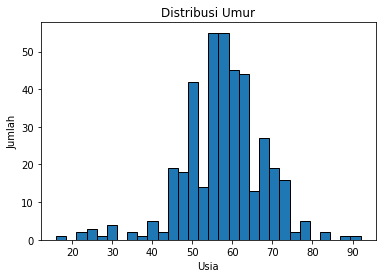

In [10]:
# Cek Distribusi Persebaran Data Umur pasien 
# Histogram for age
plt.hist(df['Usia'], bins=30, edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

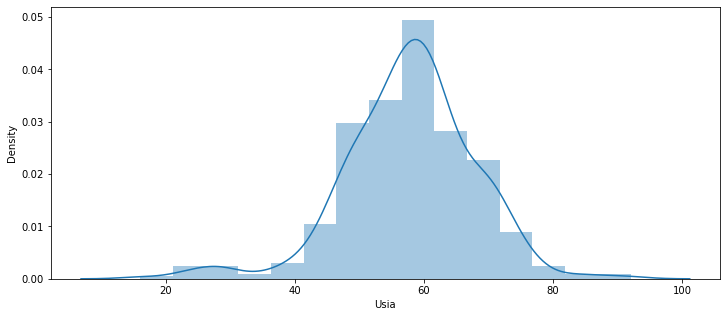

In [11]:
# melihat distribusi perbesaran usia atau umur dari dataset
plt.figure(figsize=(12,5))
sns.distplot(df['Usia'], bins=15);

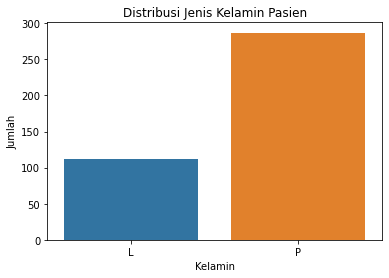

In [12]:
# Bar plot for gender
sns.countplot(x='Kelamin', data=df)
plt.title('Distribusi Jenis Kelamin Pasien')
plt.ylabel('Jumlah')
plt.show()

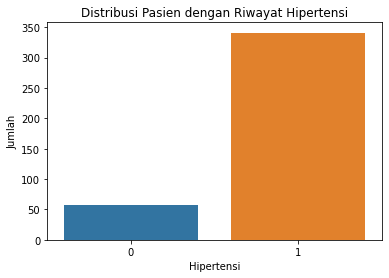

In [13]:
# Bar plot for gender
sns.countplot(x='Hipertensi', data=df)
plt.title('Distribusi Pasien dengan Riwayat Hipertensi')
plt.ylabel('Jumlah')
plt.show()

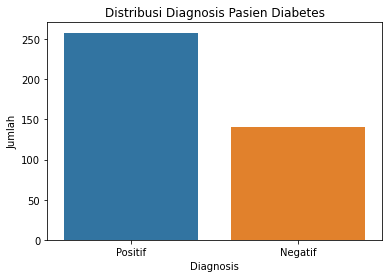

In [14]:
# Bar plot for gender
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribusi Diagnosis Pasien Diabetes')
plt.ylabel('Jumlah')
plt.show()

### Bivariat Analisis

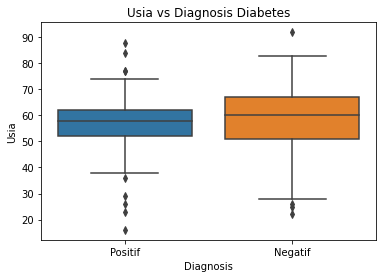

In [15]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='Diagnosis', y='Usia', data=df)
plt.title('Usia vs Diagnosis Diabetes')
plt.show()

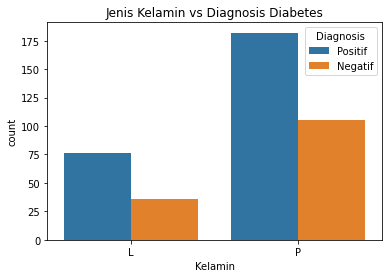

In [16]:
# Count plot of gender vs diabetes
sns.countplot(x='Kelamin', hue='Diagnosis', data=df)
plt.title('Jenis Kelamin vs Diagnosis Diabetes')
plt.show()

### Multivariate analisis

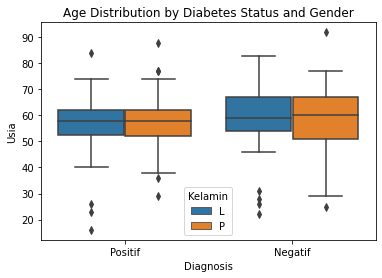

In [17]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='Diagnosis', y='Usia', hue='Kelamin', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

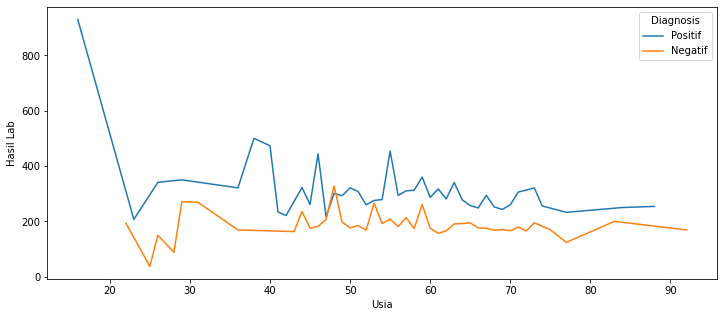

In [18]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="Usia", y="Hasil Lab", hue='Diagnosis', ci=None);

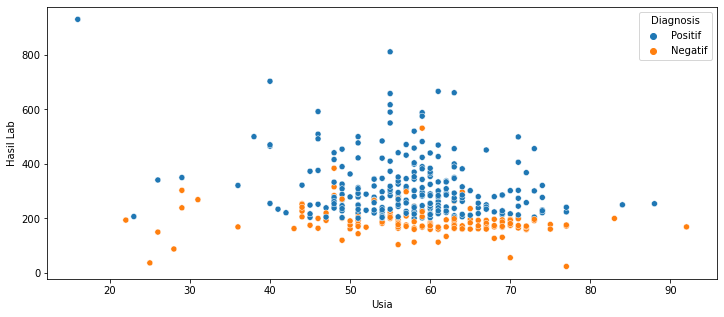

In [19]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Usia', y='Hasil Lab', hue='Diagnosis', data=df);

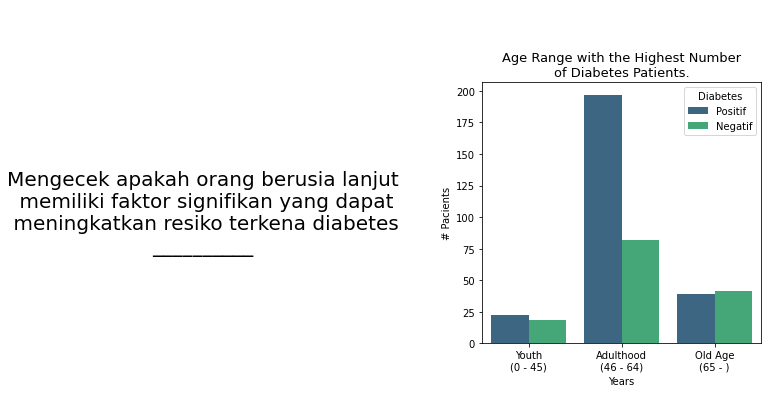

In [20]:
# DF of patients categorized by age range.
df['age_range'] = pd.cut(df['Usia'], bins=[0, 46, 65, np.inf], include_lowest=True,
                             labels=["Youth\n(0 - 45)", "Adulthood\n(46 - 64)", "Old Age\n(65 - )"])

df['old_age'] = pd.cut(df['Usia'], bins=[0, 46, np.inf], include_lowest=True,
                             labels=["Youth", "Adulthood & Old Age"])

# Adulthood & Old Age.
adul_old = len(df.loc[(df['old_age'] == "Adulthood & Old Age") & (df['Diagnosis'] == 0)])
adul_old_diabetes = len(df.loc[(df['old_age'] == "Adulthood & Old Age") & (df['Diagnosis'] == 1)])
adul_old_total = len(df.loc[(df['old_age'] == "Adulthood & Old Age")])
adul_old = round((adul_old / adul_old_total) * 100, 2)
adul_old_diabetes = round((adul_old_diabetes / adul_old_total) * 100, 2)
patients_adul_old = [adul_old, adul_old_diabetes]

# Youth.
youth = len(df.loc[(df['age_range'] == "Youth\n(0 - 45)") & (df['Diagnosis'] == 0)])
youth_diabetes = len(df.loc[(df['age_range'] == "Youth\n(0 - 45)") & (df['Diagnosis'] == 1)])
youth_total = len(df.loc[(df['age_range'] == "Youth\n(0 - 45)")])
youth = round((youth / youth_total) * 100, 2)
youth_diabetes = round((youth_diabetes / youth_total) * 100, 2)
patients_youth = [youth, youth_diabetes]

# Adulthood.
adul = len(df.loc[(df['age_range'] == "Adulthood\n(46 - 64)") & (df['Diagnosis'] == 0)])
adul_diabetes = len(df.loc[(df['age_range'] == "Adulthood\n(46 - 64)") & (df['Diagnosis'] == 1)])
adul_total = len(df.loc[(df['age_range'] == "Adulthood\n(46 - 64)")])
adul = round((adul / adul_total) * 100, 2)
adul_diabetes = round((adul_diabetes / adul_total) * 100, 2)
patients_adul = [adul, adul_diabetes]

# Old Age.
old = len(df.loc[(df['age_range'] == "Old Age\n(65 - )") & (df['Diagnosis'] == 0)])
old_diabetes = len(df.loc[(df['age_range'] == "Old Age\n(65 - )") & (df['Diagnosis'] == 1)])
old_total = len(df.loc[(df['age_range'] == "Old Age\n(65 - )")])
old = round((old / old_total) * 100, 2)
old_diabetes = round((old_diabetes / old_total) * 100, 2)
patients_old = [old, old_diabetes]

# Plot
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.5)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Mengecek apakah orang berusia lanjut\n memiliki faktor signifikan yang dapat\n meningkatkan resiko terkena diabetes\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Age Range.
ax1 = fig.add_subplot(gs[0,1])
# Definisikan palette
palette = "viridis"
ax1 = sns.countplot(df['age_range'], hue=df['Diagnosis'], palette=palette)
ax1.set_title(f"\n\n\nAge Range with the Highest Number\nof Diabetes Patients.", fontsize=13)
ax1.legend(title='Diabetes')
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.set_xlabel('Years')
ax1.set_ylabel('# Pacients')
plt.show()

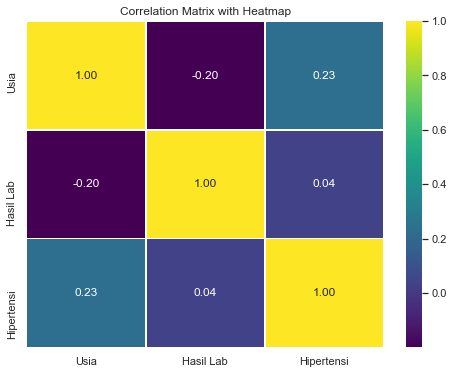

In [79]:
# Membuat matriks korelasi
correlation_matrix = df[['Usia', 'Hasil Lab', 'Hipertensi']].corr()

# Mengatur gaya visualisasi seaborn
sns.set(style="white")

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt='.2f')

# Menampilkan heatmap
plt.title("Correlation Matrix with Heatmap")
plt.show()

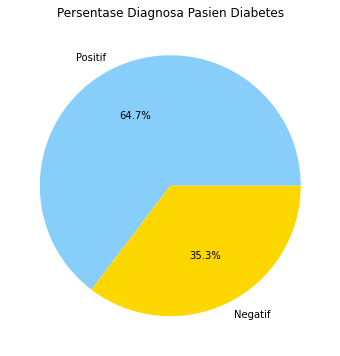

In [22]:
# Distribution of Outcome variable
def target_percent():
    plt.figure(figsize=(8, 6))
    data['Diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightskyblue', 'gold'])
    plt.title('Persentase Diagnosa Pasien Diabetes')
    plt.ylabel('')
    plt.show()
target_percent()

<AxesSubplot:xlabel='Diagnosis', ylabel='Usia'>

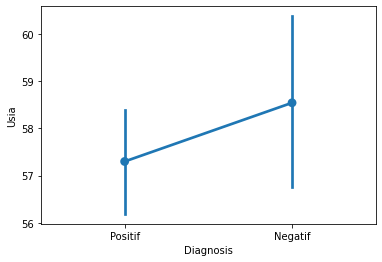

In [23]:
# Relation between age and the target used point plot
sns.pointplot(x='Diagnosis', y= 'Usia', data=data)

# Step 4 : Data Preparation

In [ ]:
df

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map({'Positif': 1, 'Negatif': 0})

df['Kelamin'] = df['Kelamin'].map({'L': 1, 'P': 0})
df.head(20)

In [26]:
# Menghapus kolom menggunakan metode drop()
kolom_dihapus = ['Id', 'age_range','old_age'] 
df1 = df.drop(kolom_dihapus, axis=1)

In [ ]:
df1

### Splitting Data

In [28]:
X = df1[['Kelamin', 'Usia', 'Hipertensi','Hasil Lab']].values
X[0:5]

array([[  1,  70,   1, 217],
       [  0,  57,   1, 258],
       [  0,  51,   1, 279],
       [  0,  62,   0, 169],
       [  0,  55,   1, 284]], dtype=int64)

In [29]:
y = df["Diagnosis"]
y[0:5]

0    1
1    1
2    1
3    0
4    1
Name: Diagnosis, dtype: int64

In [30]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [31]:
# Scalling Data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainset = scaler.fit_transform(X_trainset)
X_testset = scaler.fit_transform(X_testset)

In [32]:
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X testing set (120, 4) &  Size of Y testing set (120,)


In [33]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (279, 4) &  Size of Y training set (279,)


In [34]:
acc=[]
model=[]

# Step 5 : Data modeling (Algoritma)

### 1.Logistic Regression

In [35]:
# Deklrasikan algoritma 

In [36]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [37]:
ytrain = LR.predict(X_trainset)
ytrain

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [38]:
yhat = LR.predict(X_testset)
yhat

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [39]:
ytrain_prob=LR.predict_proba(X_trainset)
ytrain_prob

array([[0.49535574, 0.50464426],
       [0.47578494, 0.52421506],
       [0.37571657, 0.62428343],
       [0.38298981, 0.61701019],
       [0.63820594, 0.36179406],
       [0.37876849, 0.62123151],
       [0.47367787, 0.52632213],
       [0.32492599, 0.67507401],
       [0.31864408, 0.68135592],
       [0.23627254, 0.76372746],
       [0.33463242, 0.66536758],
       [0.46463565, 0.53536435],
       [0.68887656, 0.31112344],
       [0.44406295, 0.55593705],
       [0.76396612, 0.23603388],
       [0.55279382, 0.44720618],
       [0.27168407, 0.72831593],
       [0.48139389, 0.51860611],
       [0.42641341, 0.57358659],
       [0.66817648, 0.33182352],
       [0.3809426 , 0.6190574 ],
       [0.43977683, 0.56022317],
       [0.26645451, 0.73354549],
       [0.3491515 , 0.6508485 ],
       [0.45452841, 0.54547159],
       [0.47822207, 0.52177793],
       [0.43617619, 0.56382381],
       [0.29739375, 0.70260625],
       [0.2621374 , 0.7378626 ],
       [0.45399309, 0.54600691],
       [0.

In [40]:
yhat_prob = LR.predict_proba(X_testset)
yhat_prob

array([[0.6187    , 0.3813    ],
       [0.30358191, 0.69641809],
       [0.44495533, 0.55504467],
       [0.46006491, 0.53993509],
       [0.62851193, 0.37148807],
       [0.34250777, 0.65749223],
       [0.634312  , 0.365688  ],
       [0.10260809, 0.89739191],
       [0.41873139, 0.58126861],
       [0.28026488, 0.71973512],
       [0.59961268, 0.40038732],
       [0.36637442, 0.63362558],
       [0.37829286, 0.62170714],
       [0.47798348, 0.52201652],
       [0.45338217, 0.54661783],
       [0.45066601, 0.54933399],
       [0.69308558, 0.30691442],
       [0.28058317, 0.71941683],
       [0.14664167, 0.85335833],
       [0.37453947, 0.62546053],
       [0.4308431 , 0.5691569 ],
       [0.42413961, 0.57586039],
       [0.45865219, 0.54134781],
       [0.37256695, 0.62743305],
       [0.41406825, 0.58593175],
       [0.45032143, 0.54967857],
       [0.38017514, 0.61982486],
       [0.22548683, 0.77451317],
       [0.45032678, 0.54967322],
       [0.38828227, 0.61171773],
       [0.

In [41]:
# Evaluasi Model 

In [42]:
Logistic_Regression_Train=jaccard_score(y_trainset, ytrain,pos_label=0)
Logistic_Regression_Train
Logistic_Regression_Test=jaccard_score(y_testset, yhat,pos_label=0)
print(Logistic_Regression_Test)
print(Logistic_Regression_Train)

0.3584905660377358
0.5274725274725275


In [43]:
# Simpan hasil akurasi prediksi training dan testing

In [44]:
acc.append(Logistic_Regression_Test)
model.append('Logistic Regression')

In [45]:
# Menggunakan Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, yhat, labels=[1,0]))

[[67  1]
 [33 19]]


Confusion matrix, without normalization
[[67  1]
 [33 19]]


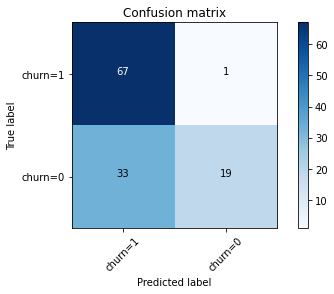

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [47]:
print (classification_report(y_testset, yhat))

              precision    recall  f1-score   support

           0       0.95      0.37      0.53        52
           1       0.67      0.99      0.80        68

    accuracy                           0.72       120
   macro avg       0.81      0.68      0.66       120
weighted avg       0.79      0.72      0.68       120



In [48]:
#computing log loss
log_loss(y_testset, yhat_prob)

0.5417222057596587

### 2. KNeighborsClassifier

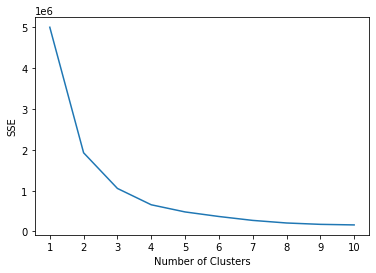

In [49]:
# Menentukan jumlah kluter dengan elbow method
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [50]:
# Elbow Method: Dalam pendekatan ini, kita memplot jumlah klaster versus SSE. Nilai SSE akan menurun saat jumlah klaster meningkat. 
# Namun, pada titik tertentu, penurunan SSE akan mulai berkurang secara signifikan, dan grafik akan terlihat seperti "siku" (elbow). 
# Pada titik tersebut, disarankan untuk memilih jumlah klaster yang sesuai. Pilih jumlah klaster di sekitar "siku" grafik di mana penurunan 
# SSE tidak signifikan lagi.

In [51]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(n_neighbors=2)

In [52]:
yhat = neigh.predict(X_testset)
yhat[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [53]:
KNN_Train=metrics.accuracy_score(y_trainset, neigh.predict(X_trainset))
KNN_Test=metrics.accuracy_score(y_testset, yhat)

In [54]:
print("Train set Accuracy: ",KNN_Train )
print("Test set Accuracy: ",KNN_Test )

Train set Accuracy:  0.967741935483871
Test set Accuracy:  0.9083333333333333


In [55]:
# Menggunakan Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, yhat, labels=[1,0]))

[[64  4]
 [ 7 45]]


In [75]:
y_testset

359    0
16     1
364    1
82     0
107    0
      ..
25     0
220    1
67     0
229    1
238    1
Name: Diagnosis, Length: 120, dtype: int64

In [78]:
yhat

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

Confusion matrix, without normalization
[[64  4]
 [ 7 45]]


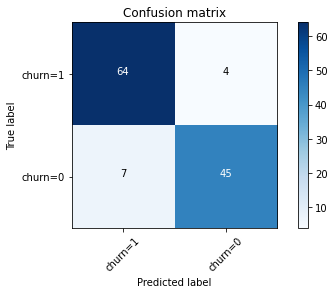

In [56]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [57]:
# Simpan nilai akurasi untuk train dan test data
acc.append(KNN_Test)
model.append('KNN')

### 3.Decision Tree

In [58]:
strokeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#othre criterion options are gini and log_loss
strokeTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
strokeTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [60]:
# prediction

In [61]:
trainTree = strokeTree.predict(X_trainset)

In [62]:
predTree = strokeTree.predict(X_testset)

In [63]:
print (predTree [0:5])
print (y_testset [0:5])

[0 1 1 0 0]
359    0
16     1
364    1
82     0
107    0
Name: Diagnosis, dtype: int64


In [64]:
# Evaluasi Model

In [65]:
Decision_Tree_Train=metrics.accuracy_score(y_trainset, trainTree)
Decision_Tree_Test=metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9


In [66]:
# Menggunakan Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, yhat, labels=[1,0]))

[[64  4]
 [ 7 45]]


Confusion matrix, without normalization
[[64  4]
 [ 7 45]]


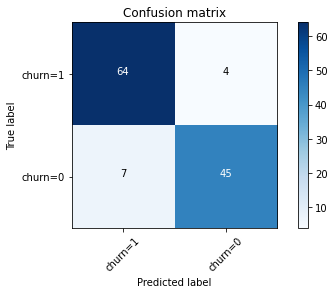

In [67]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [68]:
# Plotting Pohon Keputusan

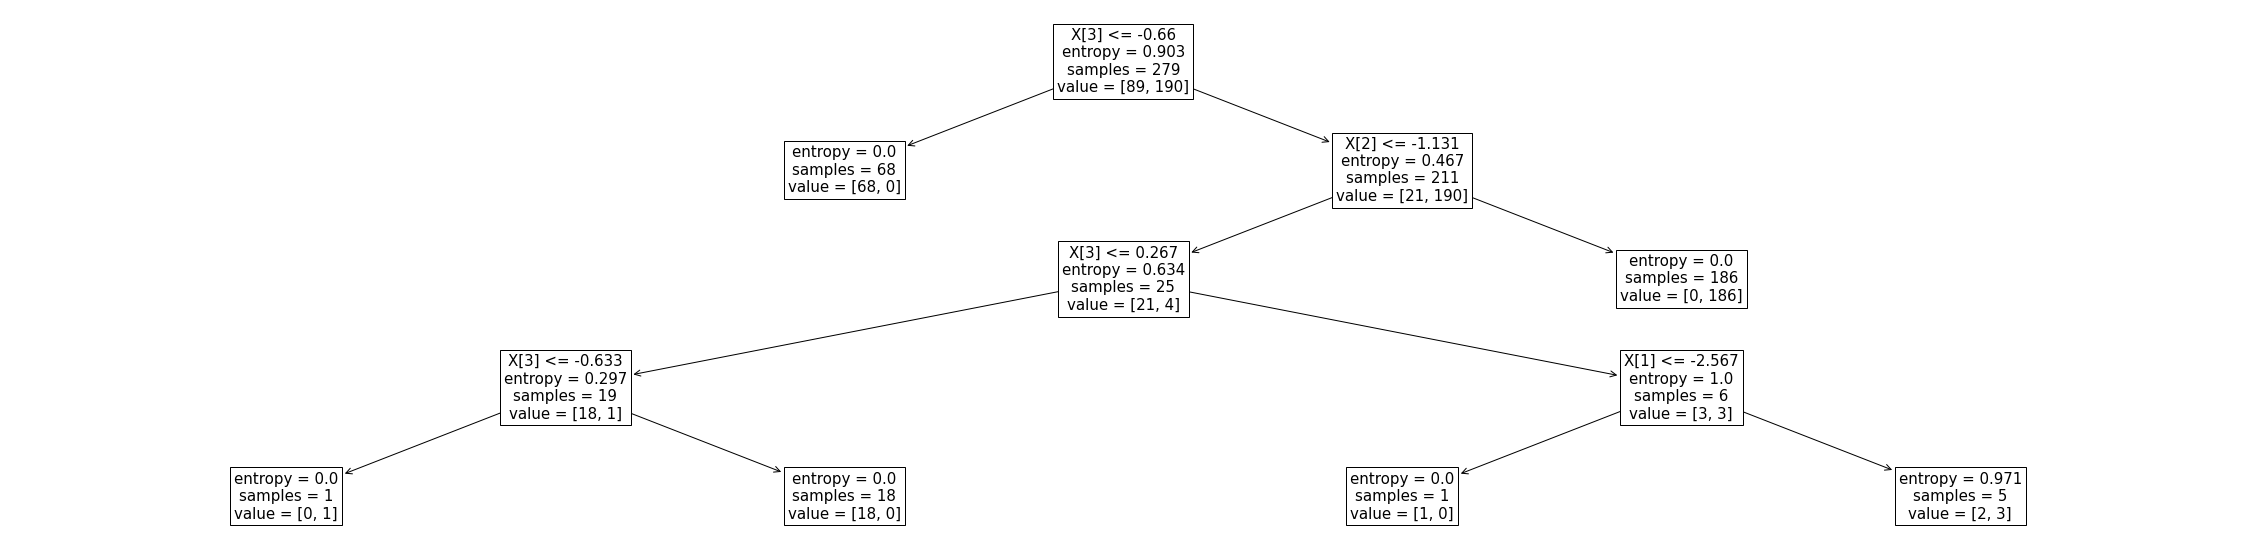

In [69]:
fig, axe = plt.subplots(figsize=(40,10));
tree.plot_tree(strokeTree,ax = axe, fontsize=15)
plt.show()

In [70]:
acc.append(Decision_Tree_Test)
model.append('Decision Tree')

### 4. Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_trainset,y_trainset)

train_values = NaiveBayes.predict(X_trainset)
predicted_values = NaiveBayes.predict(X_testset)
Naive_Bayes_Train = metrics.accuracy_score(y_trainset, train_values)
Naive_Bayes_Test = metrics.accuracy_score(y_testset, predicted_values)
acc.append(Naive_Bayes_Test)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", Naive_Bayes_Test)

print(classification_report(y_testset,predicted_values))

Naive Bayes Accuracy is:  0.7166666666666667
              precision    recall  f1-score   support

           0       0.91      0.38      0.54        52
           1       0.67      0.97      0.80        68

    accuracy                           0.72       120
   macro avg       0.79      0.68      0.67       120
weighted avg       0.78      0.72      0.68       120



### 5. Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_trainset,y_trainset)

train_values = RF.predict(X_trainset)
predicted_values = RF.predict(X_testset)

RFC_Train= metrics.accuracy_score(y_trainset, train_values)
RFC_Test= metrics.accuracy_score(y_testset, predicted_values)
acc.append(RFC_Test)
model.append('RF')
print("Random Forest Accuracy is: ", RFC_Test)

print(classification_report(y_testset,predicted_values))

Random Forest Accuracy is:  0.9
              precision    recall  f1-score   support

           0       0.95      0.81      0.88        52
           1       0.87      0.97      0.92        68

    accuracy                           0.90       120
   macro avg       0.91      0.89      0.90       120
weighted avg       0.91      0.90      0.90       120



# 6.Membandingkan Model Algoritma

### Membandungkan akurasi Model

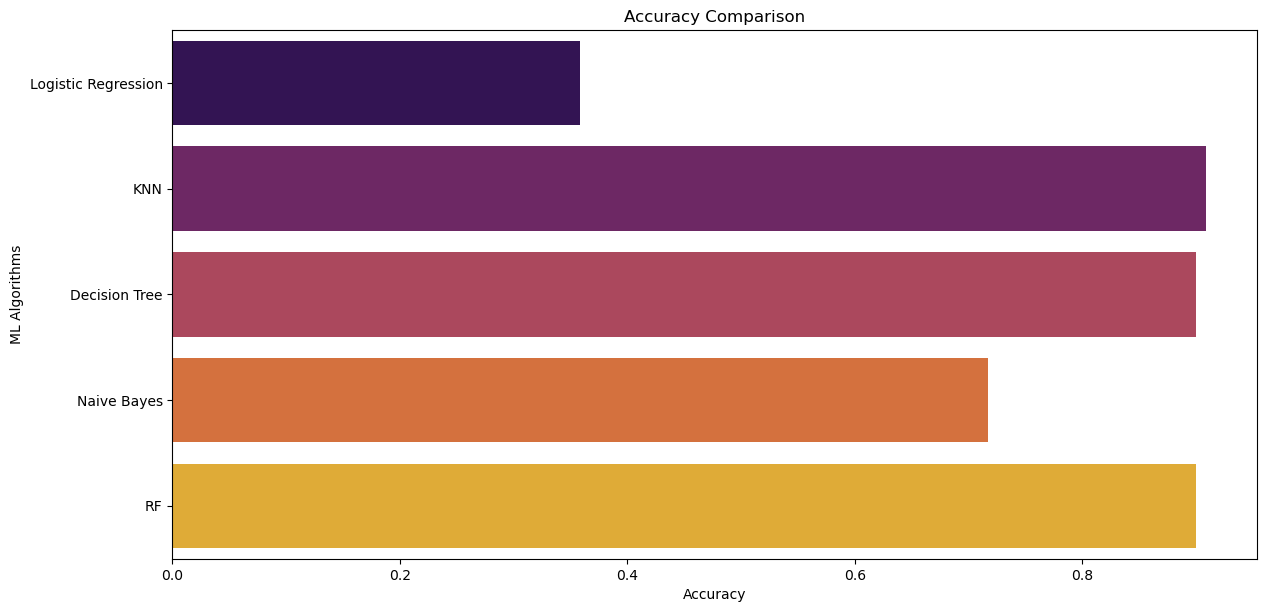

In [73]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='inferno')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

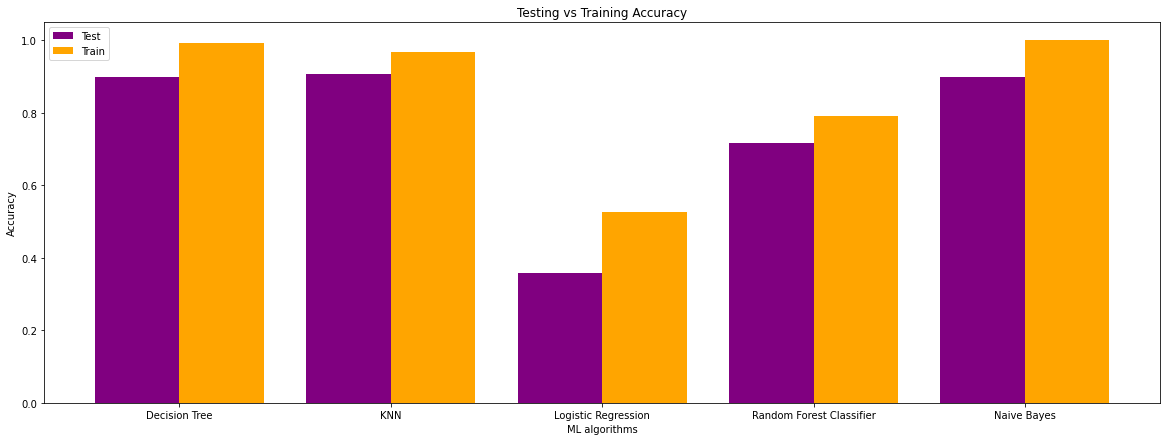

In [74]:
label = [ 'Decision Tree','KNN','Logistic Regression','Random Forest Classifier','Naive Bayes']
Test = [Decision_Tree_Test, KNN_Test,Logistic_Regression_Test,Naive_Bayes_Test,RFC_Test]
Train = [Decision_Tree_Train, KNN_Train,Logistic_Regression_Train,Naive_Bayes_Train,RFC_Train]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('purple'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('orange'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

# INSIGHT

Berikut adalah beberapa insight yang dapat diperoleh dari analisis terkait diabetes berdasarkan dataset dan model Decision Tree yang digunakan:

Faktor Risiko: Data menunjukkan bahwa riwayat diabetes (Riwayat = Ya) menjadi faktor penting yang berhubungan dengan diagnosis positif diabetes. Hal ini menunjukkan bahwa orang dengan riwayat diabetes memiliki kemungkinan lebih tinggi untuk mengalami kondisi tersebut.

Peran Gula Darah: Hasil lab gula darah (Batas Normal Gula Darah) juga mempengaruhi diagnosis diabetes. Pasien dengan hasil gula darah yang tinggi cenderung memiliki diagnosis positif diabetes. Hal ini menunjukkan pentingnya pengukuran gula darah dalam proses diagnosa dan pengelolaan diabetes.

Ketepatan Model: Model Decision Tree memiliki akurasi yang tinggi (100%) pada data uji. Hal ini menunjukkan bahwa model ini dapat digunakan sebagai alat bantu yang efektif dalam mendeteksi diabetes. Namun, penting untuk melihat performa model ini pada data yang belum pernah dilihat sebelumnya untuk memastikan kehandalannya.

Keberadaan Hipertensi: Pasien dengan hipertensi (Hipertensi = 1) cenderung memiliki diagnosis positif diabetes. Ini menunjukkan adanya hubungan antara hipertensi dan diabetes, dan perlu dilakukan pengelolaan yang tepat untuk kedua kondisi tersebut.

Usia dan Kelamin: Usia dan kelamin pasien dalam dataset ini tidak menunjukkan perbedaan yang signifikan dalam diagnosis diabetes. Namun, perlu diperhatikan bahwa ini mungkin tergantung pada karakteristik populasi dan dataset yang digunakan.

Interpretasi Medis: Penting untuk diingat bahwa hasil prediksi dari model ini memberikan perkiraan dan tidak dapat dianggap sebagai diagnosis yang pasti. Diagnosis diabetes harus dibuat oleh profesional medis yang kompeten berdasarkan informasi yang lebih lengkap, termasuk riwayat medis pasien, pemeriksaan fisik, dan tes laboratorium yang lebih komprehensif.

Kesimpulannya, analisis menggunakan model Decision Tree dan dataset ini memberikan beberapa insight mengenai diabetes, termasuk faktor risiko seperti riwayat diabetes dan hasil gula darah yang tinggi. Namun, untuk penilaian yang lebih akurat dan diagnosis yang pasti, penting untuk berkonsultasi dengan tenaga medis yang kompeten dan menggunakan informasi medis yang lebih komprehensif.

# Saran untuk RS dan pemerintah kota Kediri

Untuk Rumah Sakit:

Meningkatkan Deteksi dan Pemantauan Diabetes: Rumah sakit dapat meningkatkan upaya deteksi dini diabetes dengan melakukan skrining rutin untuk faktor risiko diabetes, seperti gula darah tinggi dan riwayat keluarga diabetes. Selain itu, pemantauan berkala pasien dengan riwayat diabetes atau kondisi yang berhubungan dapat membantu dalam mengendalikan penyakit secara efektif.

Peningkatan Edukasi Pasien: Rumah sakit dapat menyediakan program edukasi yang komprehensif kepada pasien mengenai pencegahan, pengelolaan, dan pemantauan diabetes. Edukasi ini harus meliputi pola makan sehat, aktivitas fisik, pengukuran gula darah, penggunaan obat-obatan, dan pentingnya kunjungan rutin ke dokter.

Kolaborasi dengan Pusat Penelitian: Rumah sakit dapat menjalin kolaborasi dengan pusat penelitian atau institusi medis terkait untuk mengembangkan dan menerapkan teknologi medis terkini dalam diagnosis dan pengelolaan diabetes. Hal ini dapat membantu meningkatkan kualitas layanan dan pengobatan bagi pasien diabetes.

Pendekatan Tim Multidisipliner: Rumah sakit dapat mengadopsi pendekatan tim multidisipliner dalam pengelolaan diabetes. Tim yang terdiri dari dokter, ahli gizi, perawat, dan tenaga medis lainnya dapat bekerja sama untuk memberikan perawatan yang komprehensif dan terkoordinasi kepada pasien diabetes.

Untuk Pemerintah Kota Kediri:

Kampanye Kesehatan Masyarakat: Pemerintah kota dapat menginisiasi kampanye kesehatan masyarakat yang fokus pada pencegahan diabetes. Kampanye ini dapat meliputi edukasi tentang gaya hidup sehat, pola makan seimbang, pentingnya aktivitas fisik, dan skrining diabetes secara rutin.

Membangun Pusat Kesehatan Masyarakat: Pemerintah kota dapat membangun pusat kesehatan masyarakat yang menyediakan layanan skrining diabetes, konsultasi, dan edukasi terkait diabetes. Pusat ini dapat menjadi pusat informasi dan dukungan bagi individu dengan risiko diabetes atau kondisi yang sudah terdiagnosis.

Kolaborasi dengan Pihak Swasta: Pemerintah kota dapat bekerja sama dengan pihak swasta, seperti perusahaan asuransi kesehatan atau perusahaan makanan, untuk mengembangkan program kesehatan dan insentif bagi warga yang menjalani gaya hidup sehat atau mengelola diabetes dengan baik.

Pengaturan Kebijakan Kesehatan: Pemerintah kota dapat mengatur kebijakan kesehatan yang mendukung pencegahan dan pengelolaan diabetes. Ini dapat meliputi pembatasan iklan makanan tidak sehat, mendorong peningkatan fasilitas olahraga di kota, dan menyediakan program dukungan bagi warga dengan diabetes.

Pendidikan Kesehatan di Sekolah: Pemerintah kota dapat memperkuat pendidikan kesehatan di sekolah dengan memasukkan materi tentang diabetes, pentingnya gaya hidup sehat, dan pola makan yang seimbang. Hal ini dapat membantu menciptakan kesadaran sejak dini tentang pentingnya pencegahan dan pengelolaan diabetes.

Dengan kombinasi upaya dari rumah sakit dan pemerintah kota, diharapkan dapat terjadi peningkatan kesadaran, pencegahan, dan pengelolaan diabetes di masyarakat Kota Kediri.